### **Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.** ###

The key features and their importance in predicting wine quality:-

- **Fixed Acidity:**
  - **Importance:** It can affect the wine's taste and stability.

- **Citric Acid:**
  - **Importance:** Contributes to the wine's freshness and flavor.

- **Residual Sugar:**
  - **Importance:** It can influence the wine's sweetness and balance.

- **Chlorides:**
  - **Importance:** Excessive chloride levels can lead to a salty taste.

- **Density:**
  - **Importance:** It can give an idea of the wine's body and mouthfeel.

- **pH:**
  - **Importance:** pH affects the wine's stability and taste perception.

- **Alcohol:**
  - **Importance:** Alcohol content influences the wine's body, texture, and overall character.

These features are crucial in predicting wine quality because they represent the chemical composition of the wine, which directly influences its taste, aroma, and overall quality.

---

### **Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.** ###

In the Wine Quality dataset, if we encounter missing data, we can consider several imputation techniques:-

**Advantages and disadvantages of common imputation techniques:--**

- **Mean/Median Imputation:**
  - **Advantages:** Simple, does not distort the distribution, works well for numerical data.
  - **Disadvantages:** Ignores correlations, can introduce bias if data is not missing at random.

- **Mode Imputation (for categorical data):**
  - **Advantages:** Simple, works for categorical data.
  - **Disadvantages:** Ignores correlations, may not be suitable for rare categories.

- **Regression Imputation:**
  - **Advantages:** Utilizes relationships between variables, can be more accurate.
  - **Disadvantages:** Complex, assumes linear relationships, may overfit.

- **K-Nearest Neighbors (KNN) Imputation:**
  - **Advantages:** Considers feature interactions, adaptable to various data types.
  - **Disadvantages:** Computationally intensive, sensitive to the choice of k.

---

### **Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?** ###
We can analyze factors affecting students' exam performance using statistical techniques are:-

- **Descriptive Analysis:** 
  - Start by exploring the data using summary statistics, histograms, and characteristics.

- **Correlation Analysis:**
  - Calculate correlations between exam scores and other factors or visualizations like heatmaps.

- **Hypothesis Testing:**
  - Conduct hypothesis tests to determine if there are statistically significant differences in exam scores.

- **Regression Analysis:**
  - Quantify the impact of multiple factors on exam scores and identify which ones are more influential.

- **Visualization:**
  - Create visualizations such as scatter plots to visualize relationships between factors and exam scores.

These steps will help you in analyzing and understanding the factors influencing students' exam performance.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Read Dataset
df = pd.read_csv("stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
# Checking duplication value  -->  No Duplicates value present in the dataset
df.duplicated().value_counts()

False    1000
dtype: int64

In [5]:
# Check Missing Values  -->  No Missing Values present in the dataset
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
# Check Datatype
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [7]:
# Check number of unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
# Check Stastistics of data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Observation:-
    (i). All means are very close to each other between 66 to 69.
    (ii). All the Std. is very close to each other between 14.6 to 15.9.
    (iii). There is minimum 0 in maths and 17 and 10 in reading and writing score
           while there is 100 in all of them.

In [9]:
df.columns

df["Total Score"] = df["math_score"]+df["reading_score"]+df["writing_score"]
df["Average"] = df["Total Score"]/3
df.head()
df.drop(["math_score","writing_score","reading_score","test_preparation_course"],axis=1)

,gender,race_ethnicity,parental_level_of_education,lunch,Total Score,Average
0,female,group B,bachelor's degree,standard,218,72.666667
1,female,group C,some college,standard,247,82.333333
2,female,group B,master's degree,standard,278,92.666667
3,male,group A,associate's degree,free/reduced,148,49.333333
4,male,group C,some college,standard,229,76.333333
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,282,94.000000
996,male,group C,high school,free/reduced,172,57.333333
997,female,group C,high school,free/reduced,195,65.000000
998,female,group D,some college,standard,223,74.333333


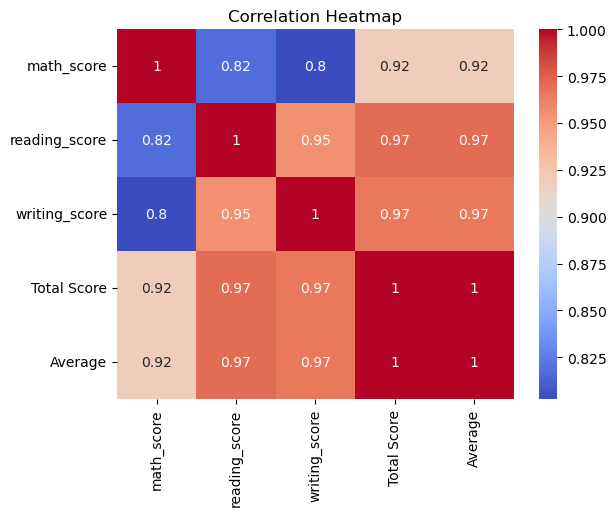

In [10]:
# Correlation analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# Hypothesis testing
# For gender:
male_scores = df[df['gender'] == 'male']['Average']
female_scores = df[df['gender'] == 'female']['Average']
t_stat, p_value = ttest_ind(male_scores, female_scores)
print(f"Gender T-test: t-statistic={t_stat}, p-value={p_value}")

Gender T-test: t-statistic=-4.169913529142, p-value=3.311973638243664e-05


In [12]:
# Regression analysis
# Predicting math scores based on other factors:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to numerical
y = df['math_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

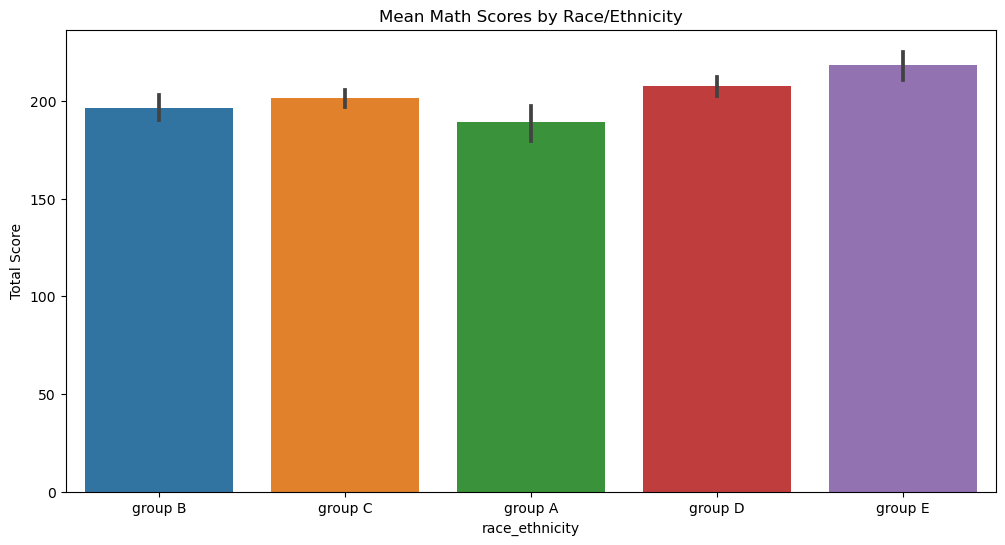

In [13]:
# Visualization
# Example: Bar chart to compare mean math scores by race/ethnicity
plt.figure(figsize=(12, 6))
sns.barplot(x='race_ethnicity', y='Total Score', data=df)
plt.title("Mean Math Scores by Race/Ethnicity")
plt.show()

---

### **Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?** ###

Process for feature engineering in this context:-

**(i) Data Exploration:**
- Begin by understanding the dataset, its columns, and the problem you want to solve.

**(ii) Feature Selection:**
- Identify which features are relevant for predicting student performance.

**(iii) Handling Categorical Variables:**
- Some variables in the dataset, like gender, race/ethnicity, parental level of education, lunch type, and test preparation course, are categorical. 
- These need to be converted into numerical format for machine learning models.

**(iv) Creating Derived Features:**
- Consider creating new features that might capture important information.

**(v) Scaling/Normalization:**
- Depending on the machine learning algorithms you plan to use, it may be necessary to scale or normalize numeric features.

**(vi) Feature Interaction:**
- Explore potential interactions between features.

**(vii) Dimensionality Reduction:**
- Consider techniques like Principal Component Analysis (PCA) to reduce dimensionality.

**(viii) Validation and Iteration:**
- Continuously validate the impact of feature engineering on model performance through cross-validation.

---

### **Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?** ###

Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. 

**Non-normal features and possible transformations:**

- *Feature(s) exhibiting non-normality:* Identify features with skewed or non-normal distributions.
  
- *Possible transformations:* Apply transformations such as log transformations, Box-Cox transformations, or other suitable methods to improve normality in skewed features.

Performing these transformations can enhance the performance of statistical models that assume normality.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
warnings.filterwarnings("ignore")
%matplotlib inline

In [15]:
# Reading Dataset
df = pd.read_csv("red_wine_cleaned.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
df.shape

(1599, 12)

In [19]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [21]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(1359, 12)

In [24]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


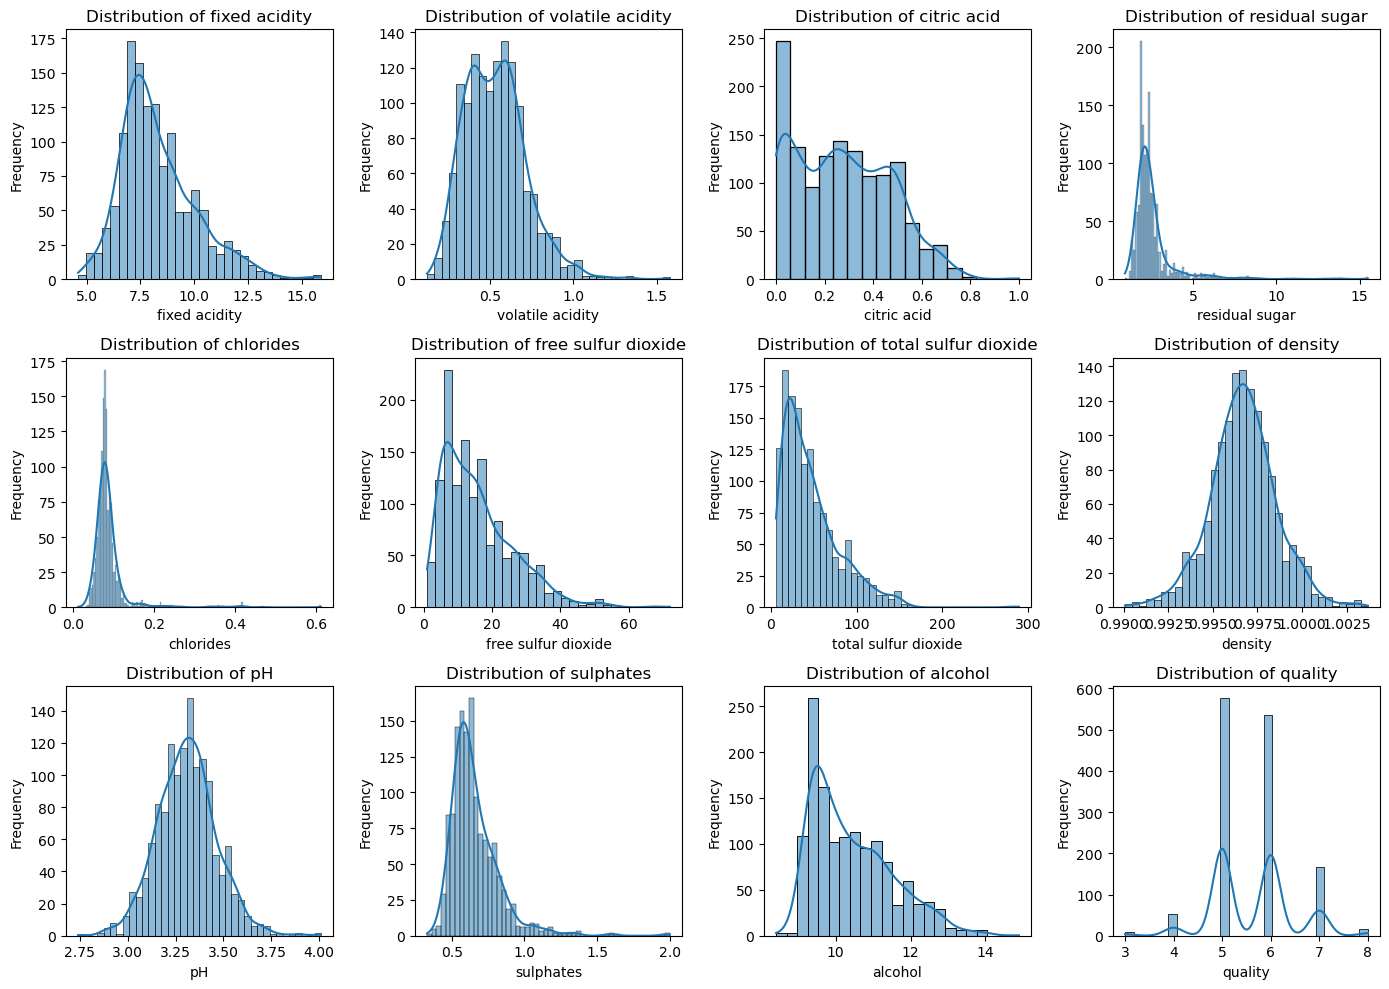

In [25]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(df.columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [26]:
from scipy import stats

alpha = 0.05
non_normal_features = []

for feature in df.columns:
    stat, p = stats.shapiro(df[feature])
    if p < alpha:
        non_normal_features.append(feature)

print("Features exhibiting non-normality:", non_normal_features)

Features exhibiting non-normality: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


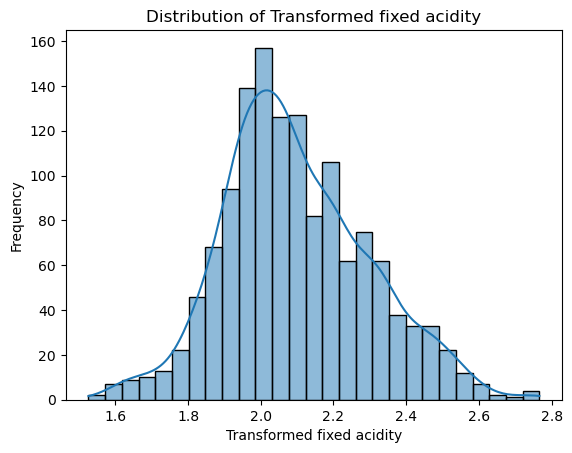

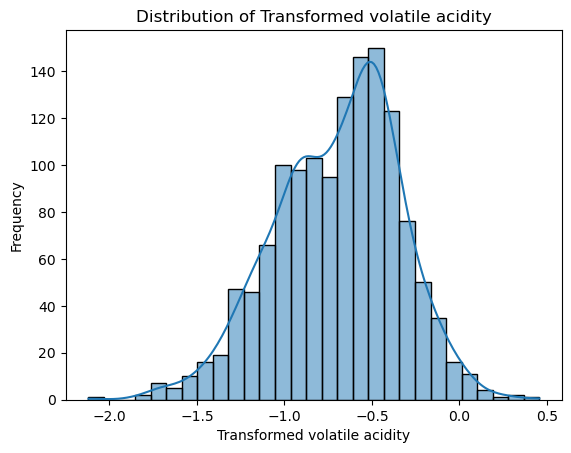

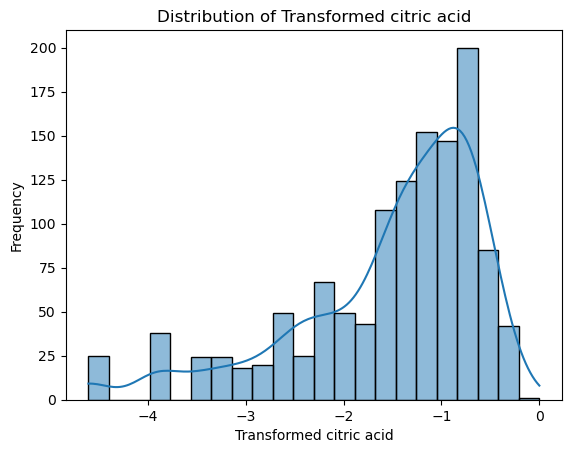

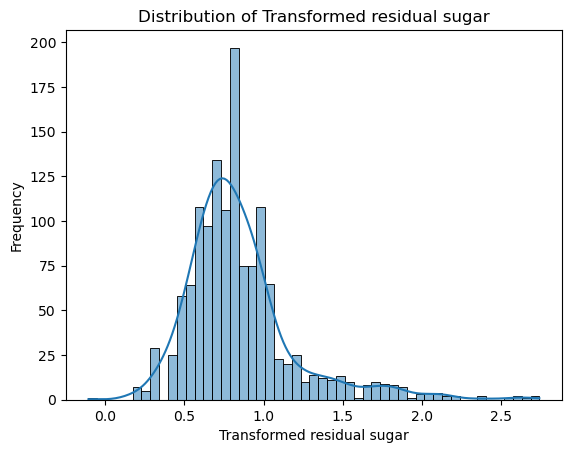

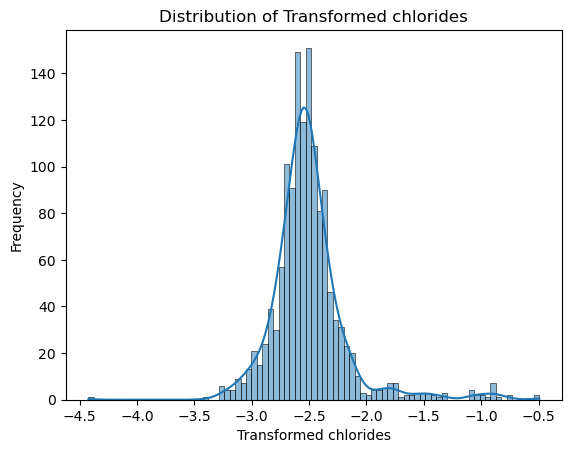

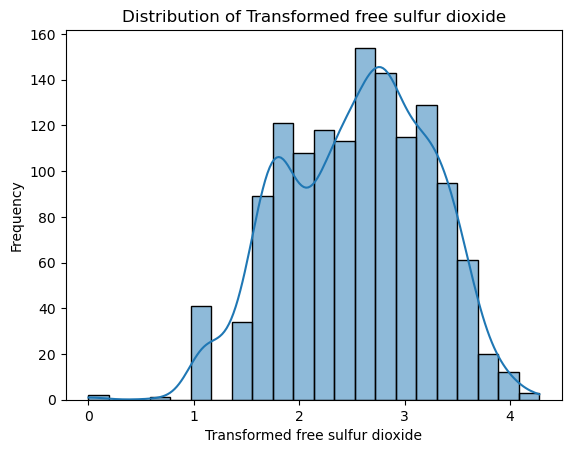

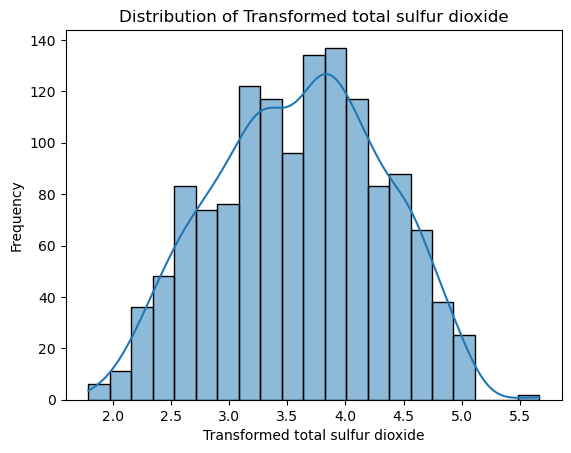

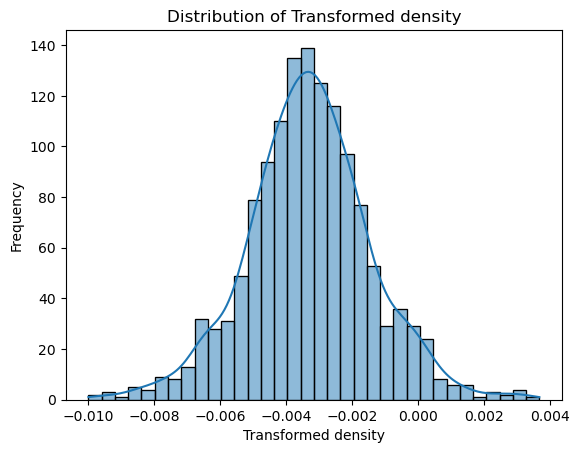

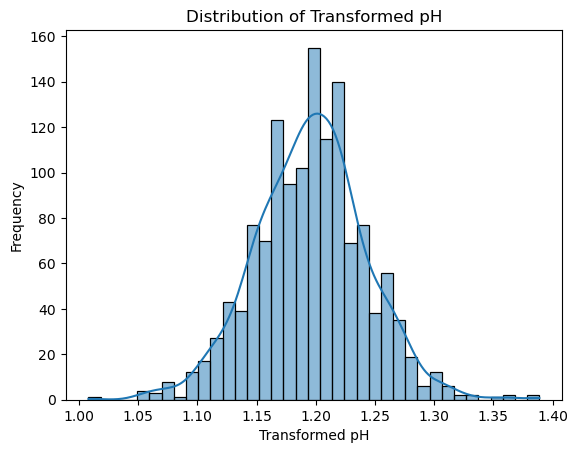

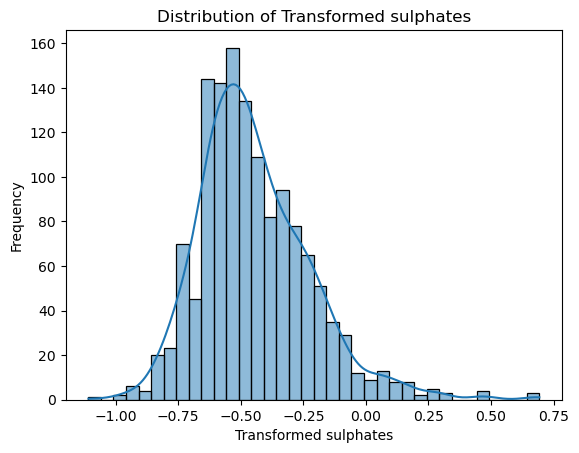

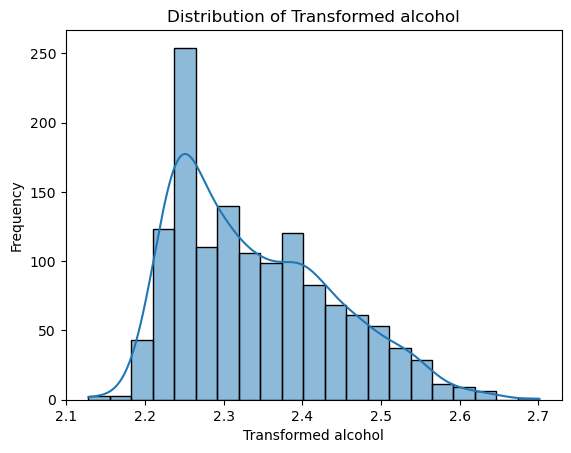

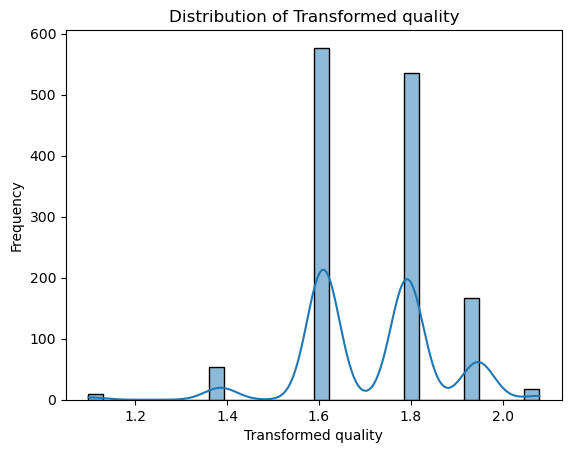

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply a log transformation to non-normal features and visualize them
for feature in non_normal_features:
    transformed_feature = np.log(df[feature])
    sns.histplot(transformed_feature, kde=True)
    plt.title(f'Distribution of Transformed {feature}')
    plt.xlabel(f'Transformed {feature}')
    plt.ylabel('Frequency')
    plt.show()

---

### **Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?** ###

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("red_wine_cleaned.csv")

# Separate the features (X) and the target (y)
X = df.drop("quality", axis=1)
y = df["quality"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of principal components required to explain 90% of the variance
n_components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1

print(f"Number of Principal Components to Explain 90% Variance: {n_components_90}")

Number of Principal Components to Explain 90% Variance: 7
